In [1]:
# -*- coding: utf-8 -*- 
featureset = ['футбол','мяч','гол', 'матч', 
              'команда', 'игра', 'кубок', 'пас',
              'выборы','президент','министр','кандидат',
              'комитет','налог','путин','чиновник', 'депутат']

In [2]:
import re, codecs
from os import walk
from pymystem3 import Mystem
m = Mystem()

address = 'texts'

In [3]:
def feature_adder (feature_dict, token):
    for feature in feature_dict:
        if feature in token:
            feature_dict[feature] +=1

In [4]:
def initialize_featuredict():
    newdict ={}
    for someft in featureset:
        newdict[someft] = 0
    return newdict

In [5]:
mydata = []
mytarget = []
for path, dirs, filenames in walk (address):
    for filename in filenames:
        featuredict = initialize_featuredict ()
        if '.txt' in filename:
            if re.match('sport', filename) !=None:
                txtclass = u'спорт'
            else:
                txtclass = u'политика'
            features_list = []
            #print (filename)
            openfile = codecs.open (path+'/'+filename, 'r', 'utf-8')
            for line in openfile:
                lemline = m.lemmatize(line)
                for token in lemline:
                    feature_adder (featuredict, token)
            mytarget.append (txtclass)
            for feat in featureset:
                features_list.append (featuredict[feat])
            mydata.append (features_list)

In [6]:
from sklearn.model_selection import train_test_split
traindata, testdata, traintarget, testtarget = train_test_split (mydata, mytarget)

In [7]:
from sklearn.tree import DecisionTreeClassifier
moy_klassifikator = DecisionTreeClassifier()
moy_klassifikator.fit(traindata, traintarget)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
moy_klassifikator.score(testdata,testtarget)

1.0

In [9]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(moy_klassifikator.predict(testdata), testtarget)

In [10]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
## Это функция, которая рисует матрицу ошибок; я украл её отсюда не глядя: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2 0]
 [0 6]]


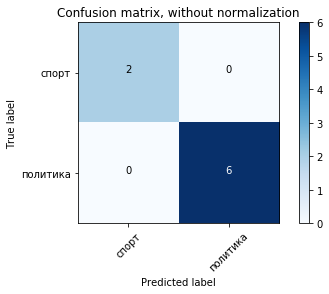

In [11]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=set(testtarget),
                      title='Confusion matrix, without normalization')
plt.show()


Normalized confusion matrix
[[ 1.  0.]
 [ 0.  1.]]


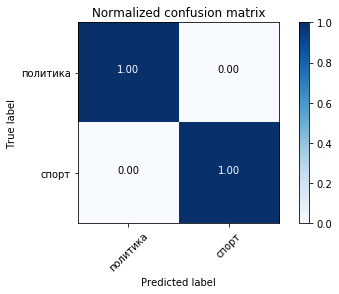

In [12]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=set(testtarget), normalize=True,
                      title='Normalized confusion matrix')
plt.show()

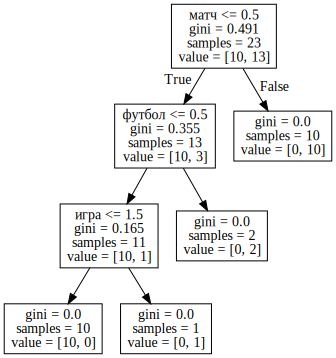

In [16]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
graph = Source(export_graphviz(moy_klassifikator, out_file=None, feature_names=featureset))
SVG(graph.pipe(format='svg'))